In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [28]:
# Read Data
data = pd.read_csv(r"C:\Users\nachi\Downloads\Dataset-SA.csv\Dataset-SA.csv")
data.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [29]:
# checking null values
print(data.isnull().sum())

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64


In [30]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Review"] = data["Review"].apply(clean)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nachi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
# The Rating column of the data contains the ratings given by every reviewer. So let’s have a look at how most of the people rate the products they buy from Flipkart

ratings = data["Rate"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

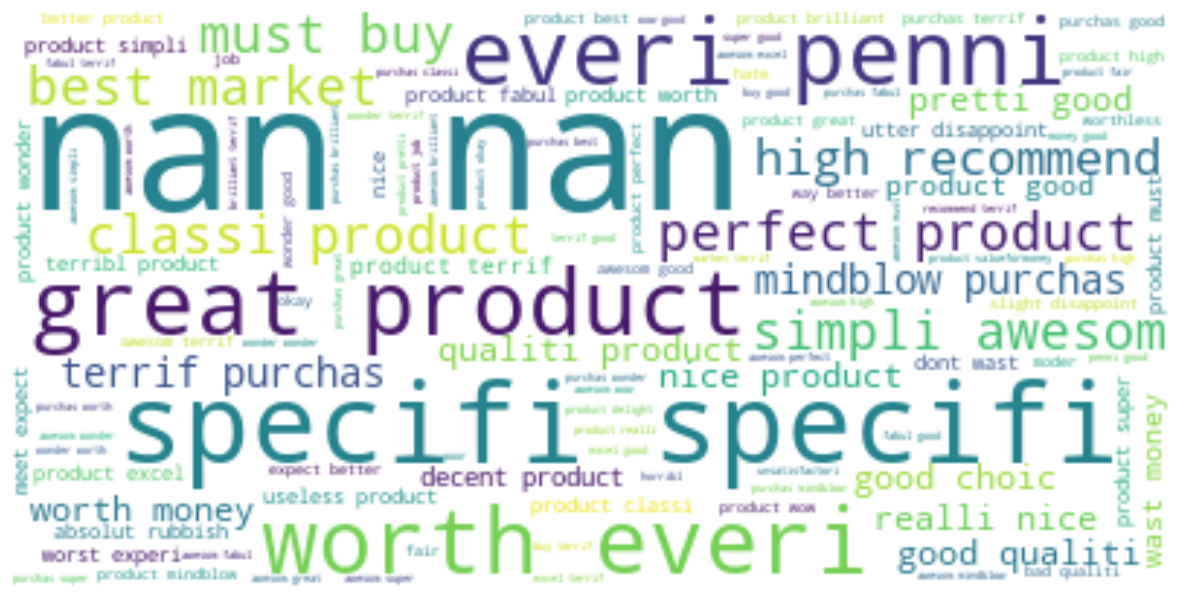

In [8]:
text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [9]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data = data[["Review", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nachi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


            Review  Positive  Negative  Neutral
0            super       1.0     0.000    0.000
1           awesom       0.0     0.000    1.000
2             fair       1.0     0.000    0.000
3  useless product       0.0     0.737    0.263
4             fair       1.0     0.000    0.000


In [10]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)


Neutral 🙂 


In [11]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  76412.76899997835
Negative:  7704.235999999504
Neutral:  120927.99799999218


In [ ]:
# various visualization 

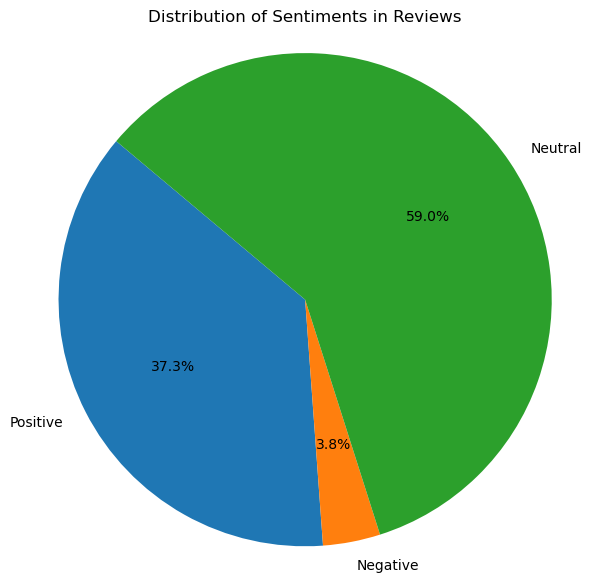

In [12]:
plt.figure(figsize=(7, 7))
sentiment_counts = [x, y, z]
sentiment_labels = ['Positive', 'Negative', 'Neutral']
plt.pie(sentiment_counts, labels=sentiment_labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Distribution of Sentiments in Reviews')
plt.show()


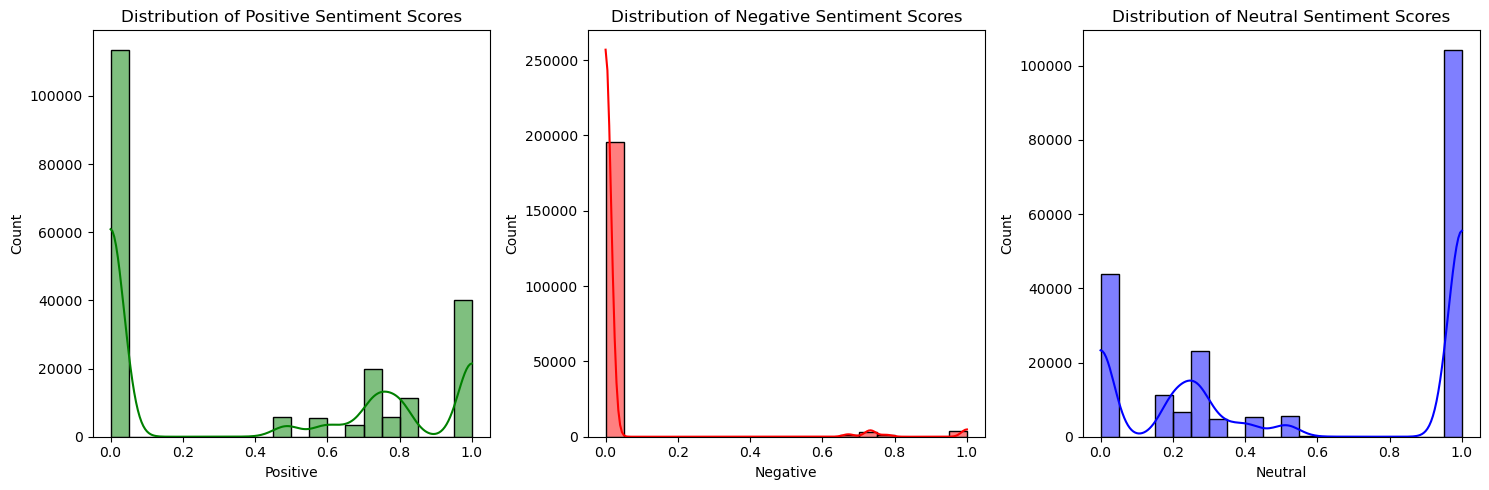

In [13]:
plt.figure(figsize=(15, 5))

# Positive Sentiment Scores
plt.subplot(1, 3, 1)
sns.histplot(data['Positive'], bins=20, kde=True, color='green')
plt.title('Distribution of Positive Sentiment Scores')

# Negative Sentiment Scores
plt.subplot(1, 3, 2)
sns.histplot(data['Negative'], bins=20, kde=True, color='red')
plt.title('Distribution of Negative Sentiment Scores')

# Neutral Sentiment Scores
plt.subplot(1, 3, 3)
sns.histplot(data['Neutral'], bins=20, kde=True, color='blue')
plt.title('Distribution of Neutral Sentiment Scores')

plt.tight_layout()
plt.show()


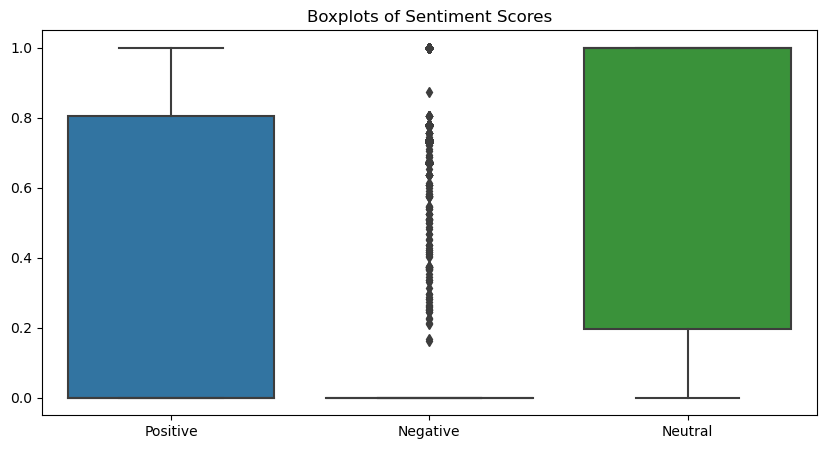

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['Positive', 'Negative', 'Neutral']])
plt.title('Boxplots of Sentiment Scores')
plt.show()


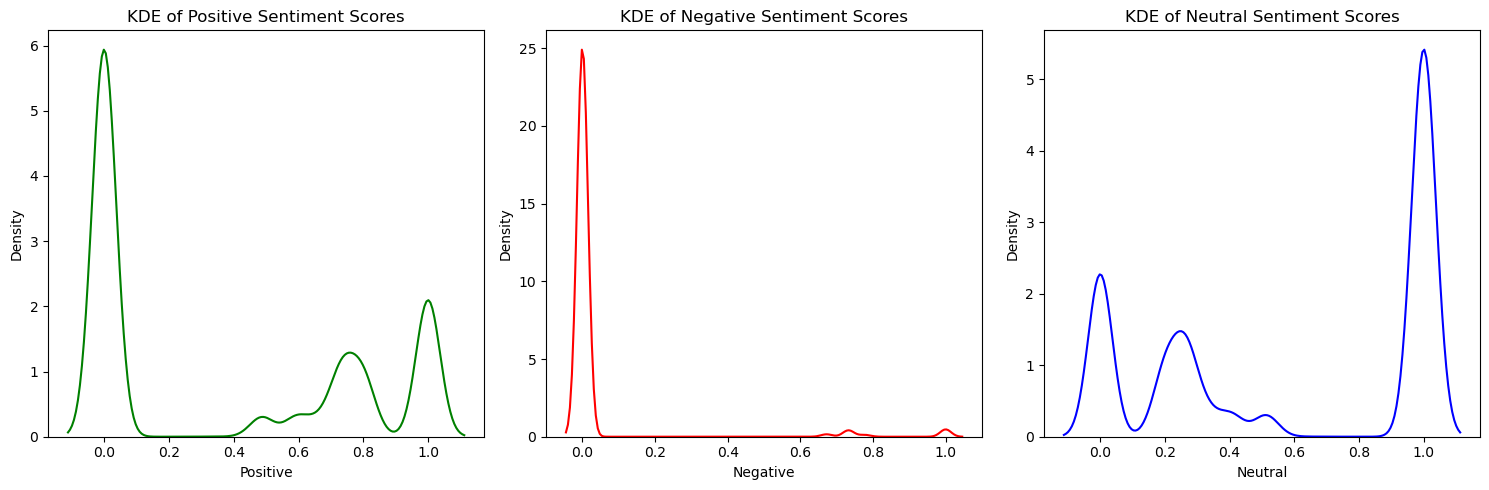

In [16]:
plt.figure(figsize=(15, 5))

# Positive Sentiment Scores
plt.subplot(1, 3, 1)
sns.kdeplot(data['Positive'], color='green')
plt.title('KDE of Positive Sentiment Scores')

# Negative Sentiment Scores
plt.subplot(1, 3, 2)
sns.kdeplot(data['Negative'], color='red')
plt.title('KDE of Negative Sentiment Scores')

# Neutral Sentiment Scores
plt.subplot(1, 3, 3)
sns.kdeplot(data['Neutral'], color='blue')
plt.title('KDE of Neutral Sentiment Scores')

plt.tight_layout()
plt.show()


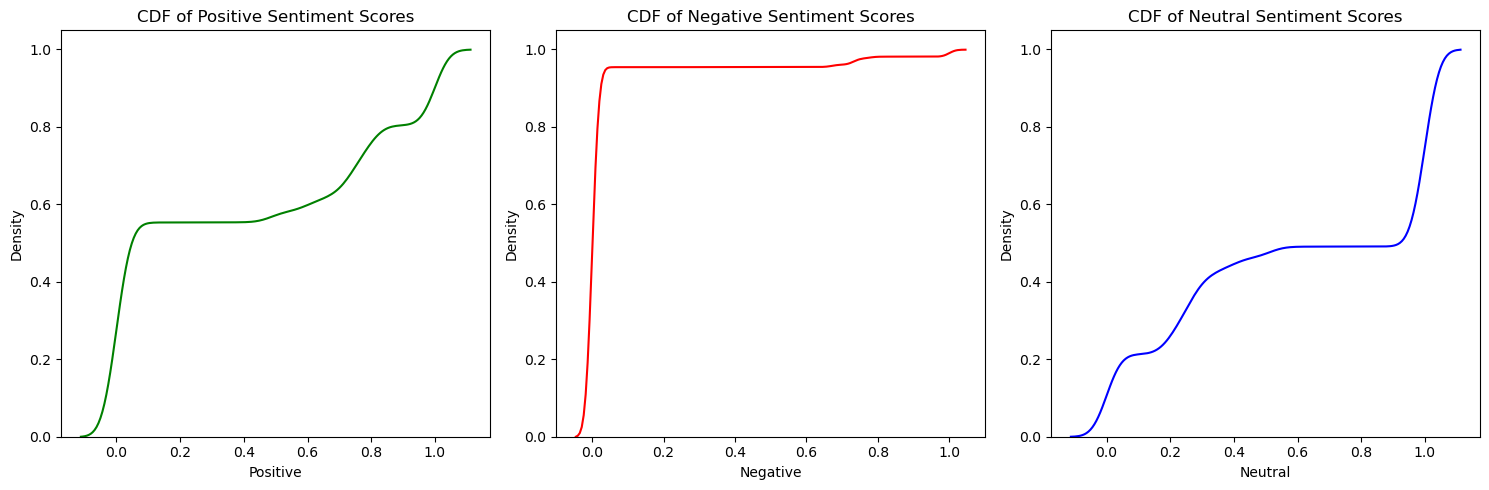

In [17]:
plt.figure(figsize=(15, 5))

# Positive Sentiment Scores
plt.subplot(1, 3, 1)
sns.kdeplot(data['Positive'], cumulative=True, color='green')
plt.title('CDF of Positive Sentiment Scores')

# Negative Sentiment Scores
plt.subplot(1, 3, 2)
sns.kdeplot(data['Negative'], cumulative=True, color='red')
plt.title('CDF of Negative Sentiment Scores')

# Neutral Sentiment Scores
plt.subplot(1, 3, 3)
sns.kdeplot(data['Neutral'], cumulative=True, color='blue')
plt.title('CDF of Neutral Sentiment Scores')

plt.tight_layout()
plt.show()


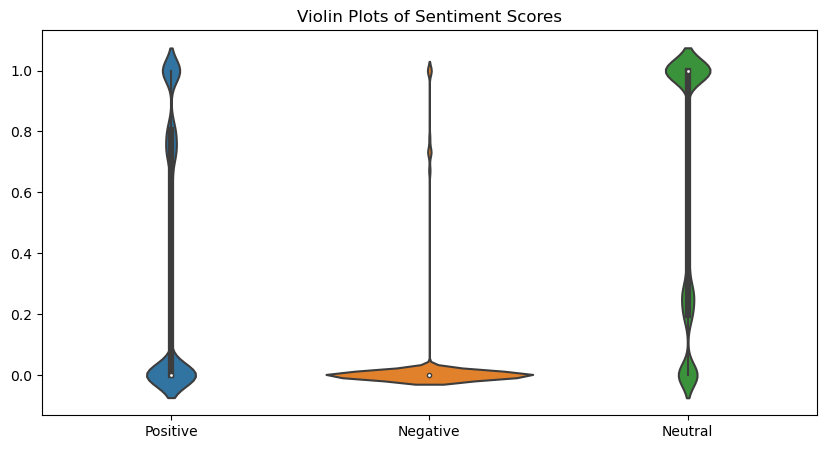

In [18]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=data[['Positive', 'Negative', 'Neutral']])
plt.title('Violin Plots of Sentiment Scores')
plt.show()


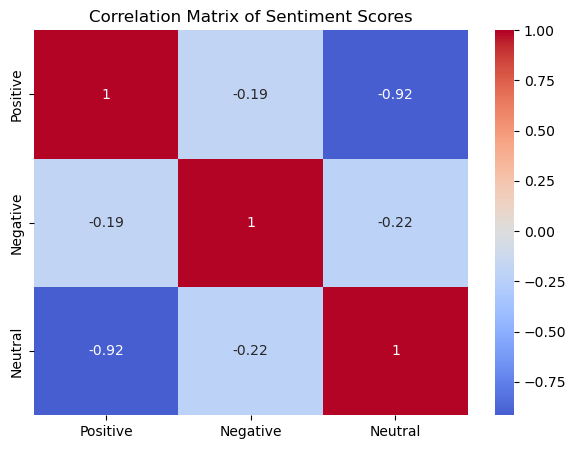

In [24]:
plt.figure(figsize=(7, 5))
corr = data[['Positive', 'Negative', 'Neutral']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Sentiment Scores')
plt.show()


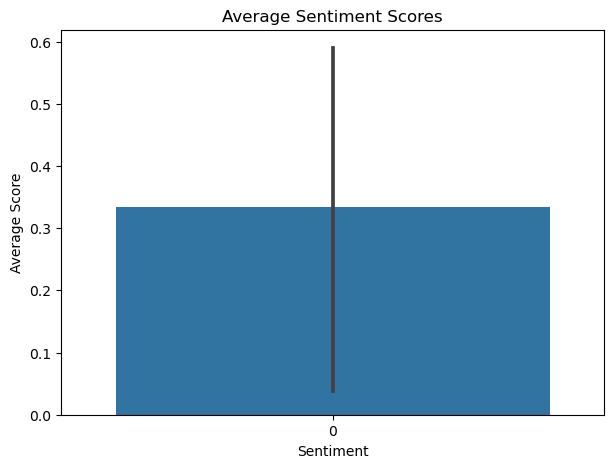

In [34]:
plt.figure(figsize=(7, 5))
avg_sentiment_scores = [x/len(data), y/len(data), z/len(data)]
sentiment_labels = ['Positive', 'Negative', 'Neutral']
sns.barplot( avg_sentiment_scores)
plt.title('Average Sentiment Scores')
plt.xlabel('Sentiment')
plt.ylabel('Average Score')
plt.show()
